<a href="https://colab.research.google.com/github/shub0411/Bike_Sharing_Demand_Prediction/blob/main/pj_2_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline 
from numpy import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
bike_df=pd.read_csv('/content/drive/MyDrive/capstone project 2/SeoulBikeData.csv', encoding ='latin')

In [49]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [50]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [51]:
bike_df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [52]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [53]:
bike_df.describe

<bound method NDFrame.describe of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°

In [54]:
bike_df.shape

(8760, 14)

In [55]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [56]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [57]:
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


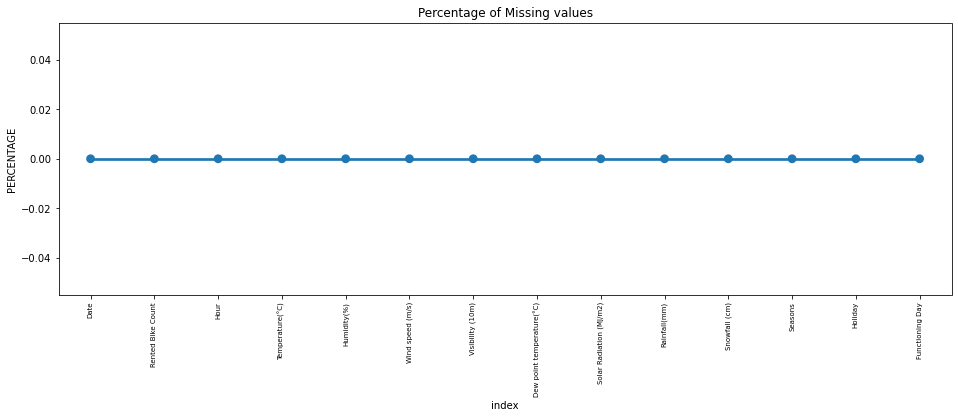

In [58]:
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# duplicate values

In [59]:
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [60]:
#changing column name and removing units name from all columns 
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day',
                                'Seasons':'Seasons'})

In [95]:
from datetime import datetime
import datetime as dt

In [96]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [97]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [98]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [99]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [100]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [101]:
bike_df.corr()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend
Rented_Bike_Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,1.335139e-01,-3.646741e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.749134e-15,-1.820420e-17
Temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,2.161826e-01,7.214426e-03
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.398748e-01,-1.695101e-02
Wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.567102e-01,-2.222677e-02
Visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,6.487420e-02,-2.676194e-02
Dew_point_temperature,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,2.425519e-01,-6.989598e-03
Solar_Radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.159544e-02,1.297545e-02
Rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.195810e-02,-1.415086e-02
Snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.312091e-02,-6.758558e-03


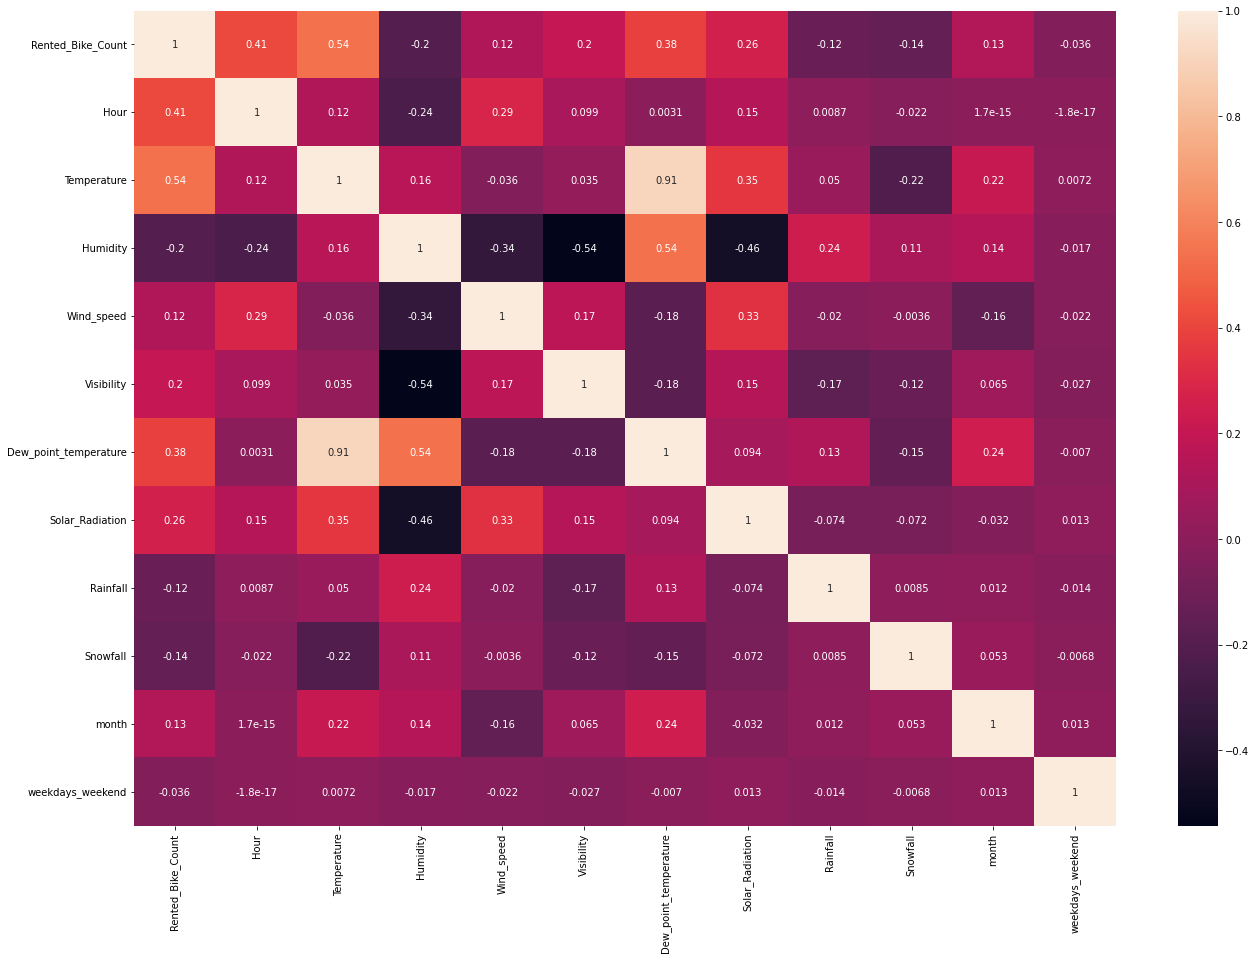

In [102]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(bike_df.corr(), annot=True, ax=ax);

In [104]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [103]:
#As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. 
#so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [105]:
bike_df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekdays_weekend            2
dtype: int64

In [107]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [106]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [109]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [110]:
bike_df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

## GRAPHS

In [64]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# SEASONS

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

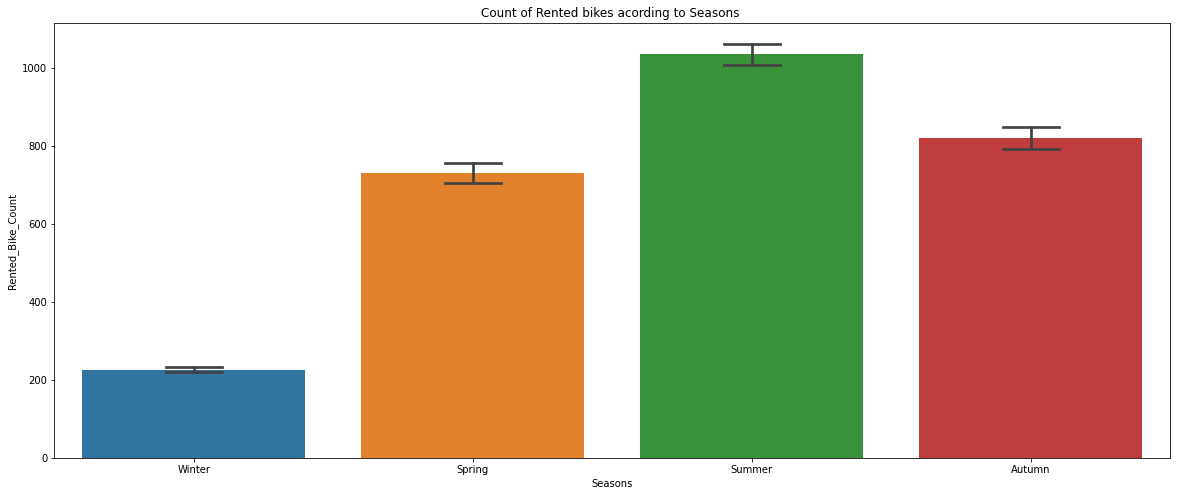

In [118]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

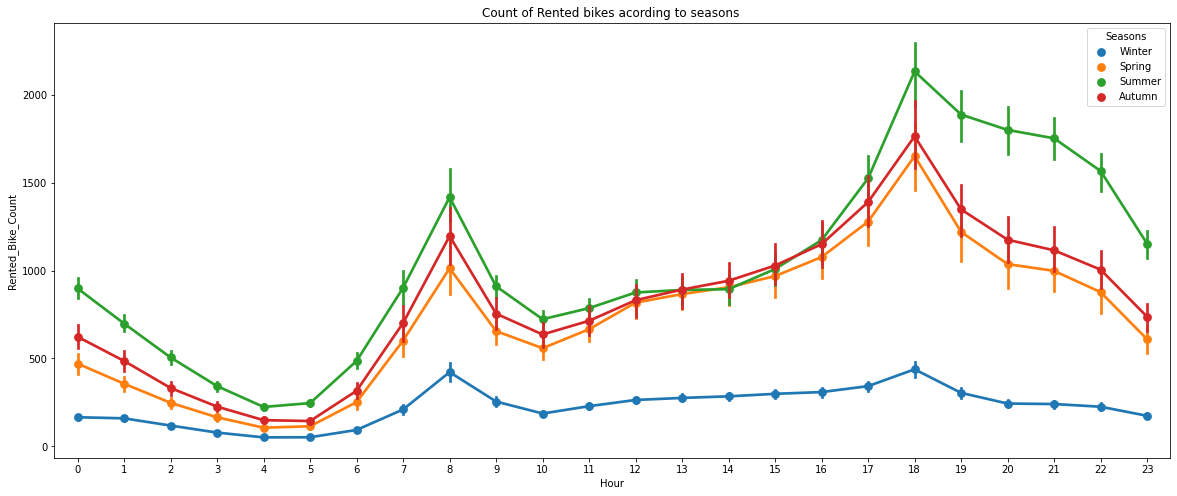

In [117]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

## HOURS COUNTS

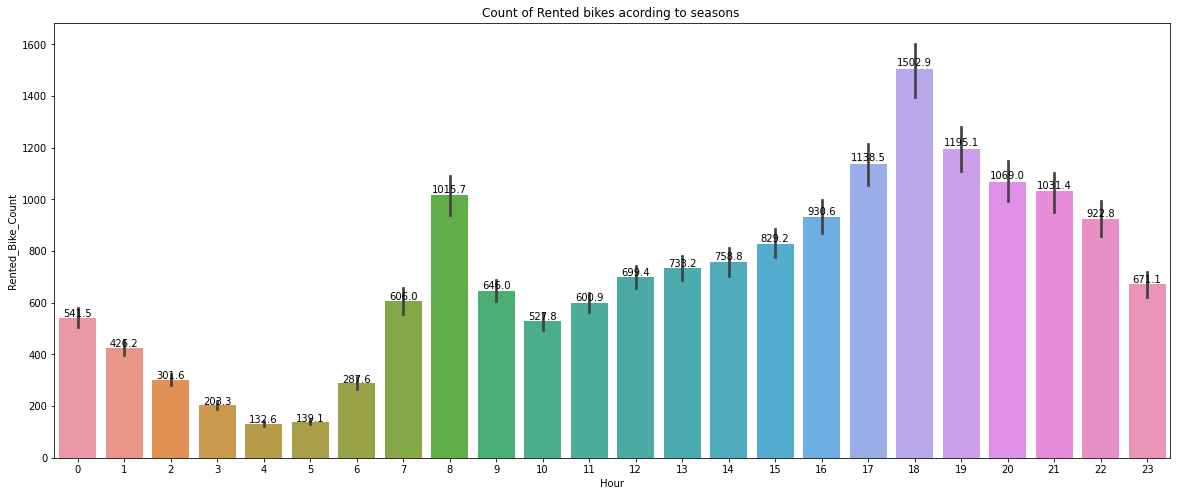

In [67]:
fig,ax=plt.subplots(figsize=(20,8))
p=sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')
show_values(p)


## *HOLIDAYS*

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

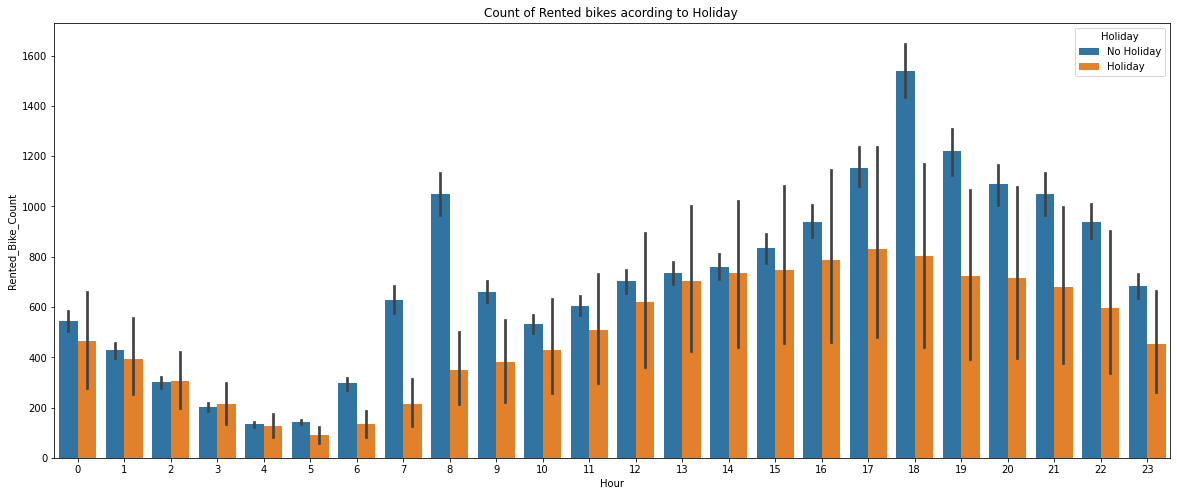

In [113]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

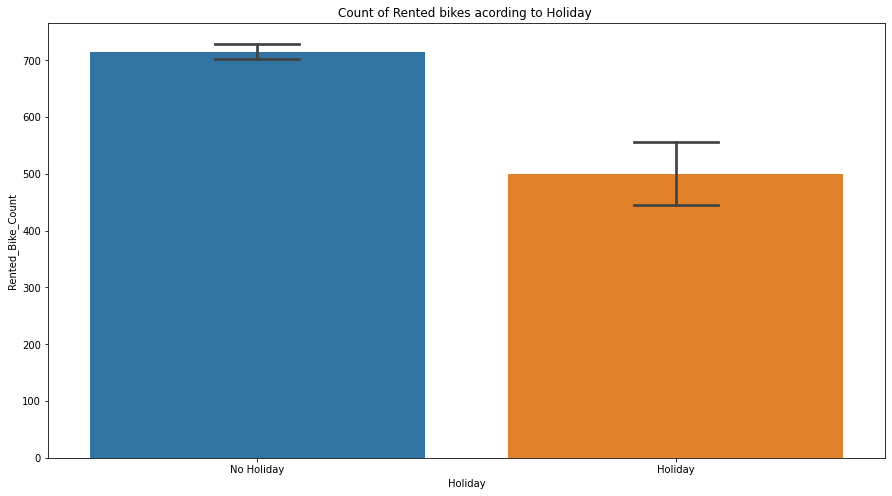

In [68]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

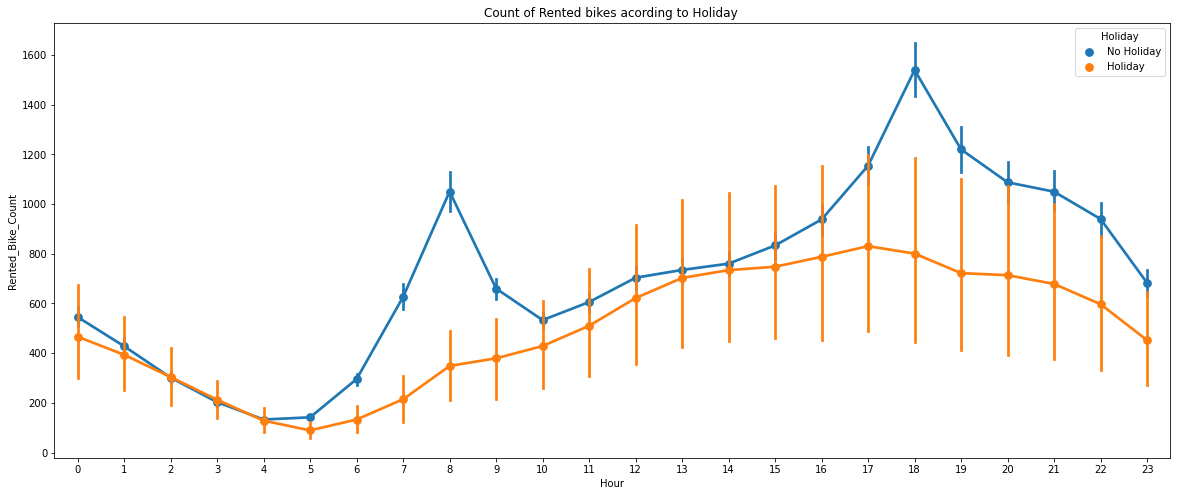

In [119]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

## MONTH

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

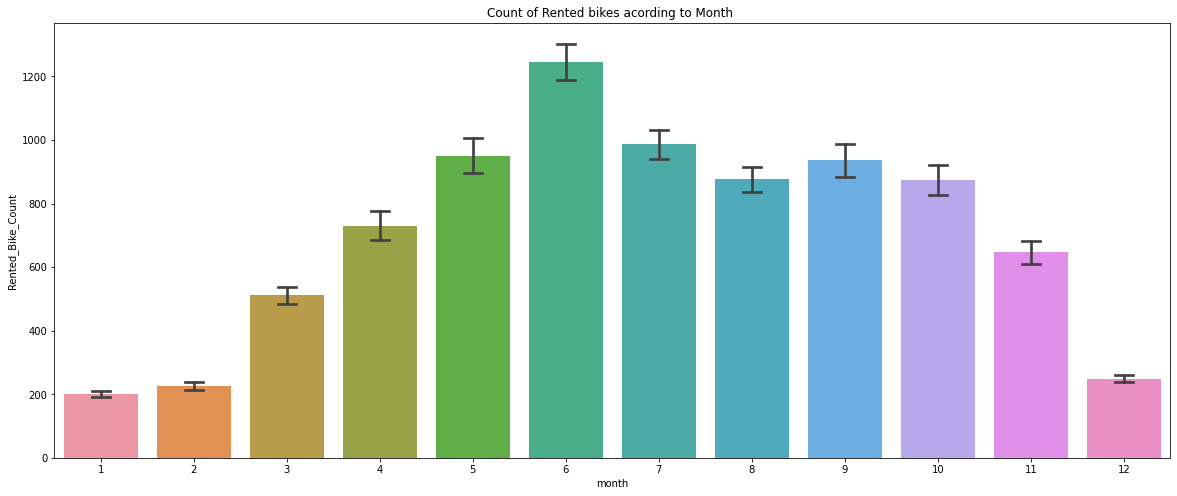

In [111]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

## weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

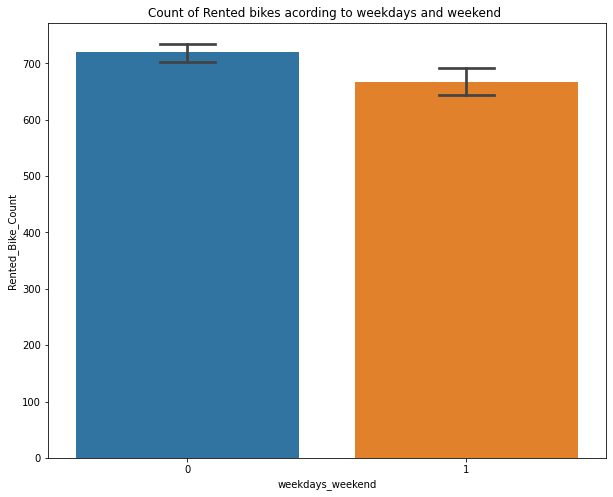

In [112]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

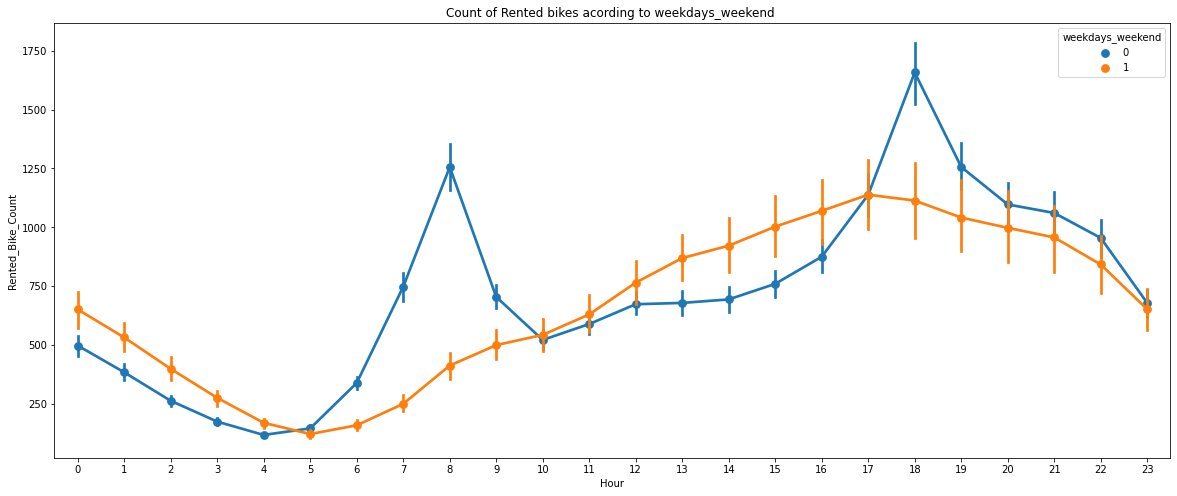

In [114]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

## FUNCTIONING DAY

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

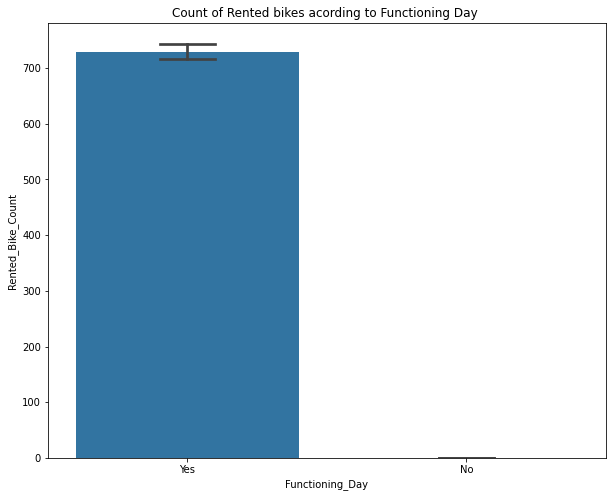

In [115]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

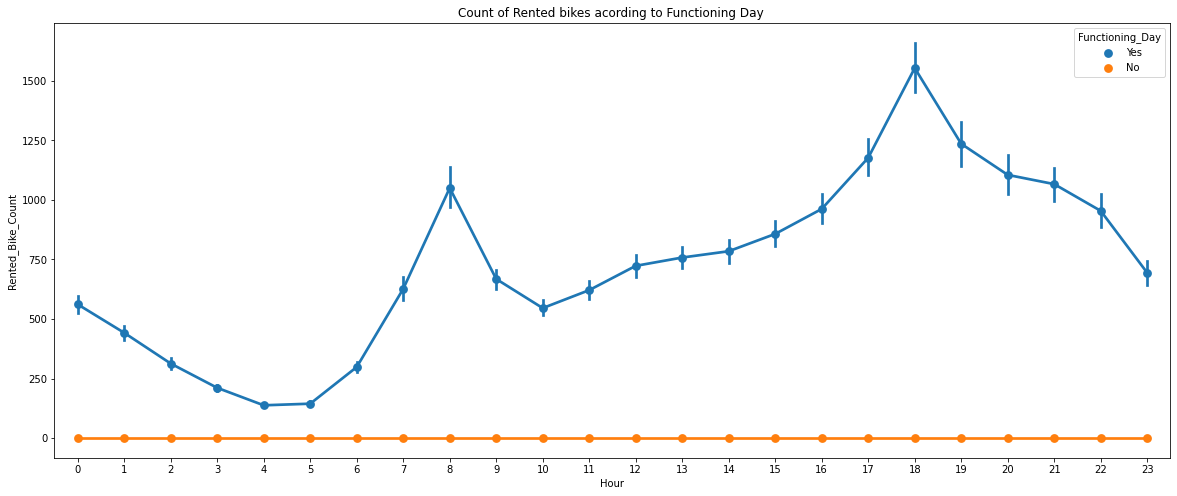

In [116]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats

In [30]:
# Create dummy variables for the catgeorical variable State
bike_df['No_Holiday'] = np.where(bike_df['Holiday']=='No Holiday', 1, 0)
bike_df['Functioning_Day_numeral'] = np.where(bike_df['Functioning_Day']=='Yes', 1, 0)

In [31]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,No_Holiday,Functioning_Day_numeral
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,1,1


In [32]:
# Create dummy variables for the catgeorical variable Season
bike_df['winter_season'] = np.where(bike_df['Seasons']=='Winter', 1, 0)
bike_df['spring_season'] = np.where(bike_df['Seasons']=='Spring', 1, 0)
bike_df['summer_season'] = np.where(bike_df['Seasons']=='Summer', 1, 0)
bike_df['autumn_season'] = np.where(bike_df['Seasons']=='Autumn', 1, 0)
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,...,Functioning_Day,year,month,day,No_Holiday,Functioning_Day_numeral,winter_season,spring_season,summer_season,autumn_season
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Yes,2017,1,12,1,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Yes,2017,1,12,1,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Yes,2017,1,12,1,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Yes,2017,1,12,1,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Yes,2017,1,12,1,1,1,0,0,0


In [33]:
# Drop the original categorical column Seasons, Holiday, Functioning_Day from the dataframe
bike_df.drop(columns=['Date','Seasons', 'Holiday', 'Functioning_Day'],axis=1,inplace=True)
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,year,month,day,No_Holiday,Functioning_Day_numeral,winter_season,spring_season,summer_season,autumn_season
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,1,1,1,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,1,1,1,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,1,1,1,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,1,1,1,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,1,1,1,0,0,0


In [34]:
# dependent variable is
dependent_variable = 'Rented_Bike_Count'

In [35]:
# Create a list of independent variables
independent_variables = list(set(bike_df.columns.tolist()) - {dependent_variable})
independent_variables

['Hour',
 'Dew_point_temperature',
 'Functioning_Day_numeral',
 'year',
 'Temperature',
 'Solar_Radiation',
 'No_Holiday',
 'Rainfall',
 'summer_season',
 'Snowfall',
 'Visibility',
 'Wind_speed',
 'Humidity',
 'day',
 'winter_season',
 'month',
 'spring_season',
 'autumn_season']

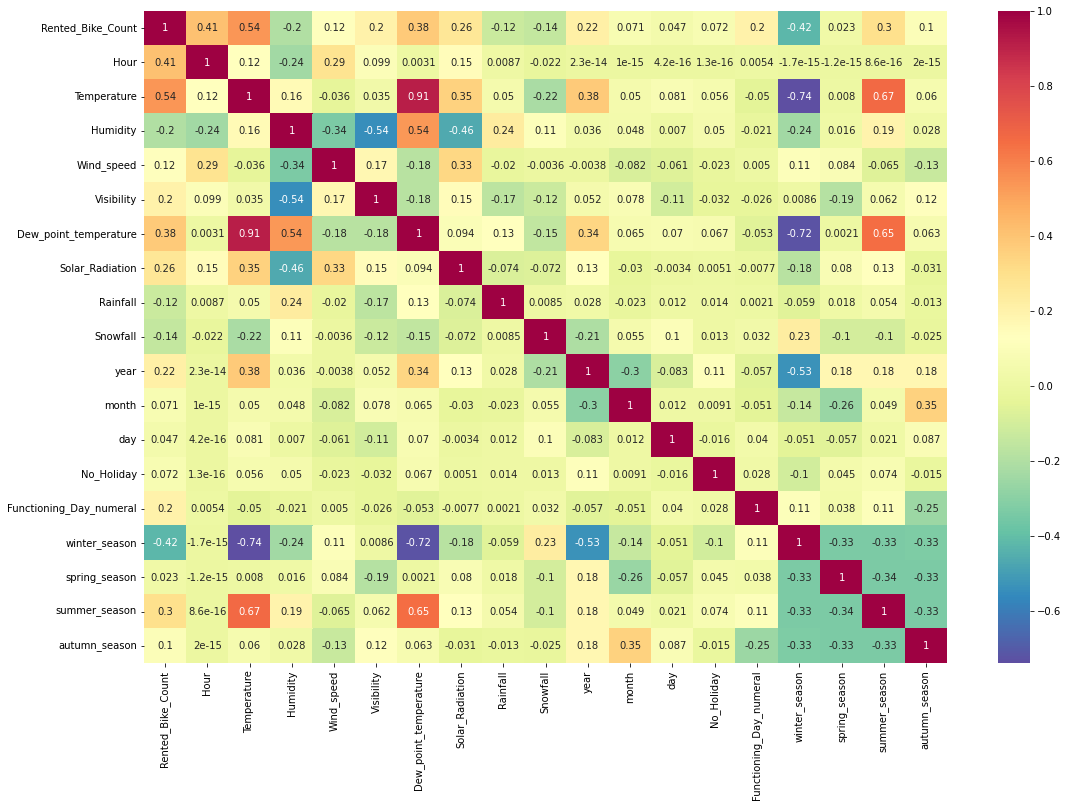

In [36]:
plt.figure(figsize=(18,12))
sns.heatmap(bike_df.corr(),annot= True, cmap='Spectral_r')

**From heatmap, we can see that Temperature & Dew point temperature are strongly correlated, and both of these are correlated to Summer and winter as well.**

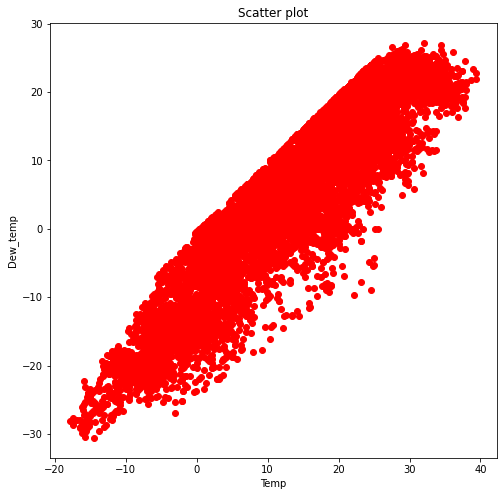

In [37]:
# Scatter plot between Profit and Marketing Spend

plt.figure(figsize=(8,8))
plt.scatter(bike_df['Temperature'], bike_df['Dew_point_temperature'], color='red')
plt.title('Scatter plot')
plt.xlabel('Temp')
plt.ylabel('Dew_temp')
plt.show()

**Temperature and Dew point temperature are lineraly related to each other. Thus we will check VIF value for these two.**

In [38]:
# Create the data of independent variables
X = bike_df[independent_variables].values

# Create the dependent variable data
Y = bike_df[dependent_variable].values



In [69]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 18)
(1752, 18)


In [40]:
X_train[0:10]

array([[ 1.500e+01,  1.300e+00,  1.000e+00,  2.018e+03,  8.200e+00,
         1.220e+00,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         2.910e+02,  6.000e-01,  6.200e+01,  2.300e+01,  1.000e+00,
         2.000e+00,  0.000e+00,  0.000e+00],
       [ 1.800e+01,  1.900e+01,  1.000e+00,  2.018e+03,  2.840e+01,
         8.400e-01,  1.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
         2.000e+03,  2.400e+00,  5.700e+01,  3.100e+01,  0.000e+00,
         8.000e+00,  0.000e+00,  0.000e+00],
       [ 1.100e+01,  2.040e+01,  1.000e+00,  2.018e+03,  2.990e+01,
         8.800e-01,  1.000e+00,  1.000e-01,  1.000e+00,  0.000e+00,
         1.992e+03,  1.700e+00,  5.700e+01,  2.300e+01,  0.000e+00,
         8.000e+00,  0.000e+00,  0.000e+00],
       [ 1.000e+01, -3.000e+00,  1.000e+00,  2.018e+03,  1.480e+01,
         2.200e+00,  1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         1.749e+03,  6.000e-01,  2.900e+01,  2.500e+01,  0.000e+00,
         4.000e+00,  1.000e+00,  0.000e+00],
    

In [41]:
X_test

array([[ 3. ,  6. ,  1. , ...,  5. ,  1. ,  0. ],
       [ 2. , 17.6,  1. , ...,  9. ,  0. ,  1. ],
       [17. , -2.3,  1. , ..., 10. ,  0. ,  0. ],
       ...,
       [ 0. ,  7.5,  1. , ...,  4. ,  1. ,  0. ],
       [22. ,  5.8,  1. , ..., 10. ,  0. ,  1. ],
       [ 0. ,  4.4,  1. , ..., 10. ,  0. ,  1. ]])

In [42]:
Y_train

array([ 312, 2836,  711, ..., 1066,  401,  513])

In [43]:
Y_test

array([ 320,  580,  226, ...,  213, 1331,  783])

In [70]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
X_train[0:10]

array([[0.65217391, 0.55574913, 1.        , 1.        , 0.45534151,
        0.34659091, 1.        , 0.        , 0.        , 0.        ,
        0.13116421, 0.08108108, 0.63265306, 0.73333333, 1.        ,
        0.09090909, 0.        , 0.        ],
       [0.7826087 , 0.8641115 , 1.        , 1.        , 0.80910683,
        0.23863636, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.32432432, 0.58163265, 1.        , 0.        ,
        0.63636364, 0.        , 0.        ],
       [0.47826087, 0.88850174, 1.        , 1.        , 0.83537653,
        0.25      , 1.        , 0.00285714, 1.        , 0.        ,
        0.99593289, 0.22972973, 0.58163265, 0.73333333, 0.        ,
        0.63636364, 0.        , 0.        ],
       [0.43478261, 0.48083624, 1.        , 1.        , 0.5709282 ,
        0.625     , 1.        , 0.        , 0.        , 0.        ,
        0.87239451, 0.08108108, 0.29591837, 0.8       , 0.        ,
        0.27272727, 1.        , 0.        ],
    

In [80]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
reg=regressor.fit(X_train, Y_train)

In [81]:
reg.score(X_train, Y_train)

0.5527908746448789

In [82]:
reg.coef_

array([  626.97161811,   739.18605197,   934.60540201,   -94.8685854 ,
         818.44126081,  -271.920579  ,   122.24071483, -1939.5019346 ,
          24.62244645,   245.61596402,    27.73264389,   147.14599226,
       -1111.79541898,   -33.50029621,  -229.4357621 ,    -7.86463112,
          36.08755017,   168.72576548])

In [76]:
# Predicting the Test set results
Y_pred = regressor.predict(X_test)

In [77]:
Y_pred

array([ 414.13159586,  765.4781227 ,  566.72075899, ...,  186.41779085,
       1180.19869612,  507.12422001])

In [78]:
Y_test

array([ 320,  580,  226, ...,  213, 1331,  783])

In [84]:
math.sqrt(mean_squared_error(Y_test, Y_pred))

435.62128062606746

In [88]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= math.sqrt(mean_squared_error(Y_test, Y_pred))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)



r2_lr= r2_score(Y_test, Y_pred)
print("R2 :",r2_lr)



MSE : 435.62128062606746
RMSE : 20.87154236337285
R2 : 0.5465814621019176


In [ ]:
r2_score(y_test, y_pred)